Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Cleaning and Preprocessing

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('googleplaystore.csv')
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in specific columns
df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'], inplace=True)

# Display the dataframe information to confirm changes
df.info()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 


In [4]:
import pandas as pd

# Load your data
df = pd.read_csv('googleplaystore.csv')

# Display unique values in 'Installs' to check for erroneous data
print(df['Installs'].unique())

# Remove rows with non-numeric 'Installs' data
df = df[df['Installs'].str.contains('^\d', regex=True)]

# Convert 'Installs' to int after cleaning
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Display the cleaned 'Installs' data
print(df['Installs'].unique())

# Convert 'Reviews' to int, assuming 'Reviews' has been cleaned similarly if needed
df['Reviews'] = df['Reviews'].apply(lambda x: ''.join(filter(str.isdigit, x))).astype(int)

# Cleaning Price assuming it's already cleaned for non-numeric values like 'Free'
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')) if '$' in x else float(x))

# Define and apply the size conversion function
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

# Verify all changes
print(df.head())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0  

In [5]:
# Count and print the number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 483


In [6]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Print the new shape of the DataFrame to confirm duplicates have been removed
print("New shape of the DataFrame:", df.shape)

New shape of the DataFrame: (10357, 13)


In [7]:
# Displays the first few rows of the DataFrame
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Exploratory Data Analysis (EDA)

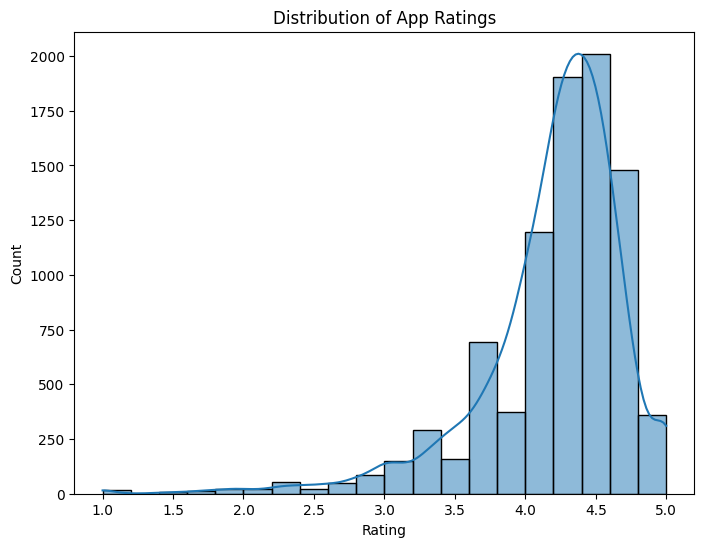

In [8]:
# Distribution of App Ratings

plt.figure(figsize=(8,6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-9-b039228d0646>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


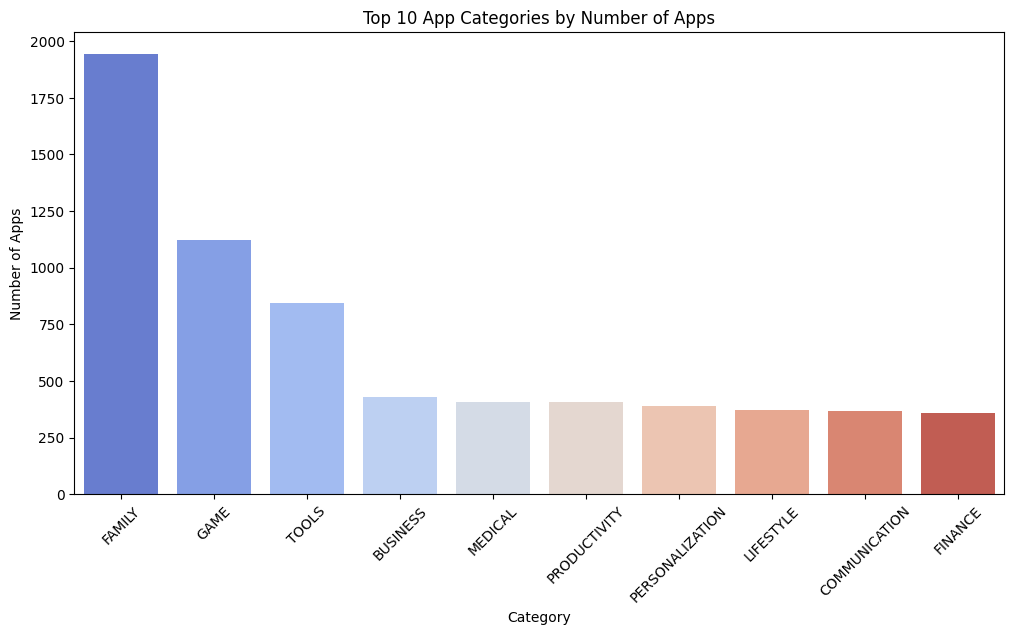

In [9]:
# Top 10 Categories by Number of Apps

plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-92a305bc8fa1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Type'], palette='Set2')


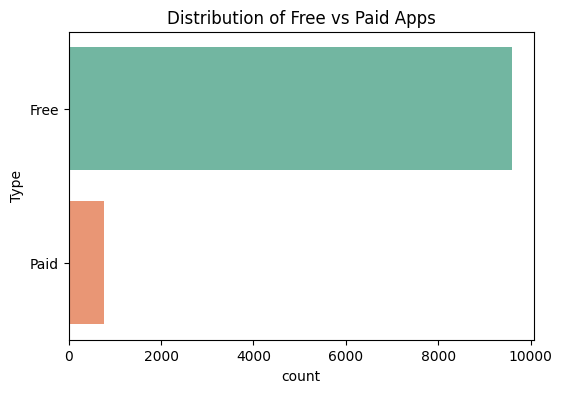

In [10]:
# Free vs Paid Apps

plt.figure(figsize=(6,4))
sns.countplot(df['Type'], palette='Set2')
plt.title('Distribution of Free vs Paid Apps')
plt.show()

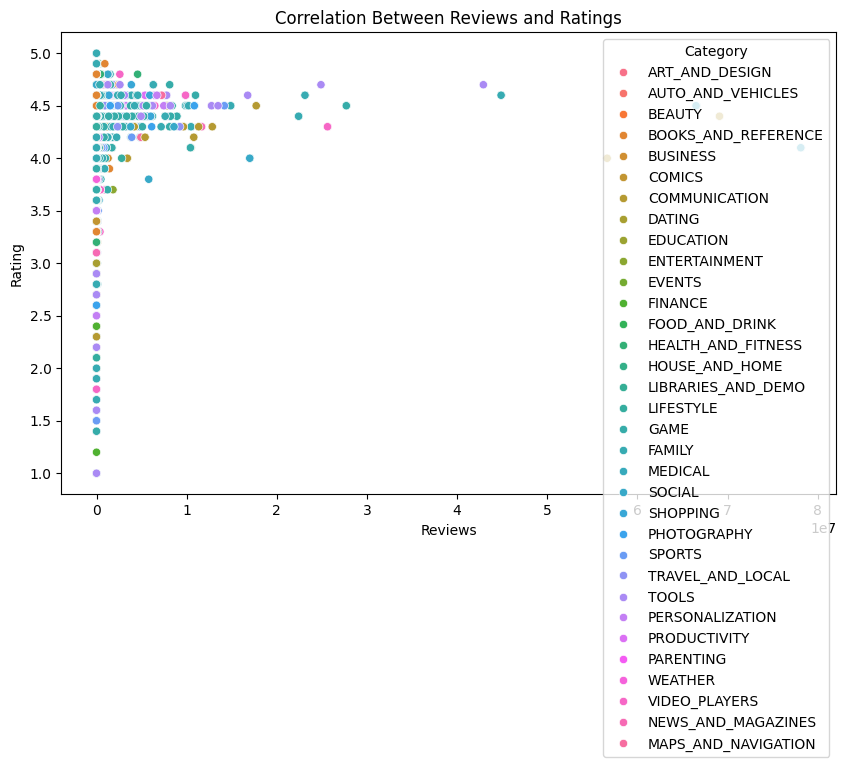

In [11]:
# Correlation Between Reviews and Rating

plt.figure(figsize=(10,6))
sns.scatterplot(x='Reviews', y='Rating', data=df, hue='Category')
plt.title('Correlation Between Reviews and Ratings')
plt.show()

Price Analysis

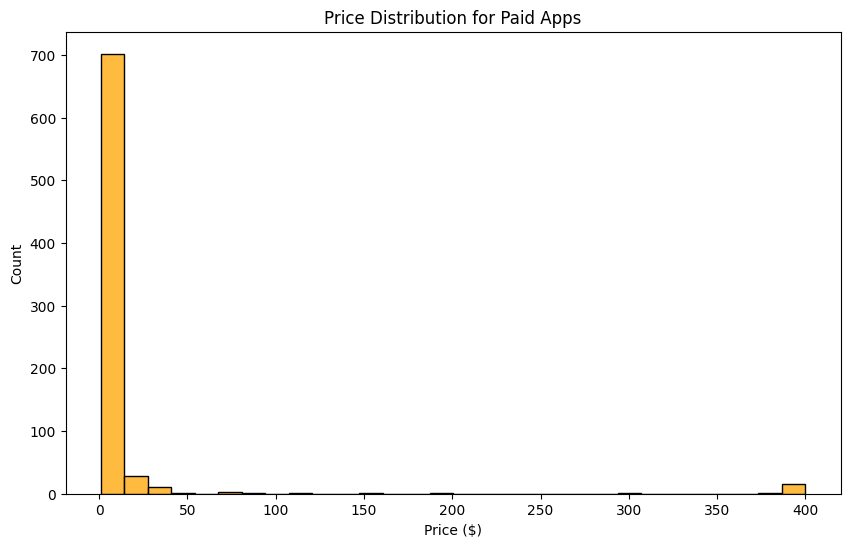

In [12]:
# Price Distribution for Paid Apps

paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(10,6))
sns.histplot(paid_apps['Price'], bins=30, color='orange')
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

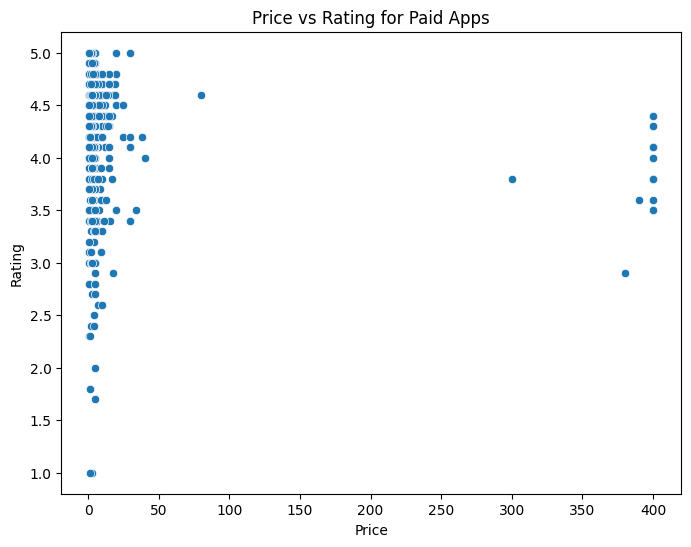

In [13]:
# Relationship Between Price and Rating

plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Price vs Rating for Paid Apps')
plt.show()

Content Rating Analysis

<ipython-input-14-a2dc3665da27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_ratings.index, y=content_ratings.values, palette='coolwarm')


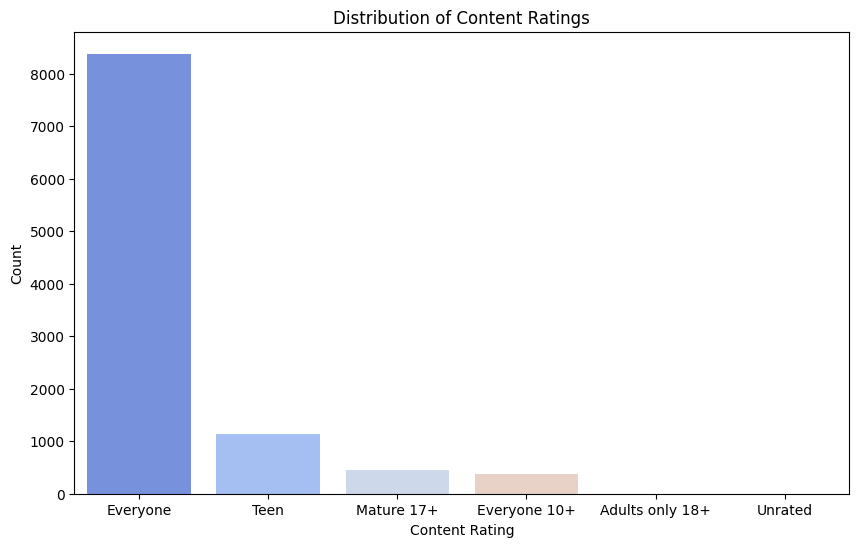

In [14]:
# Distribution of Content Ratings

plt.figure(figsize=(10,6))
content_ratings = df['Content Rating'].value_counts()
sns.barplot(x=content_ratings.index, y=content_ratings.values, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-15-72490e73fd68>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')


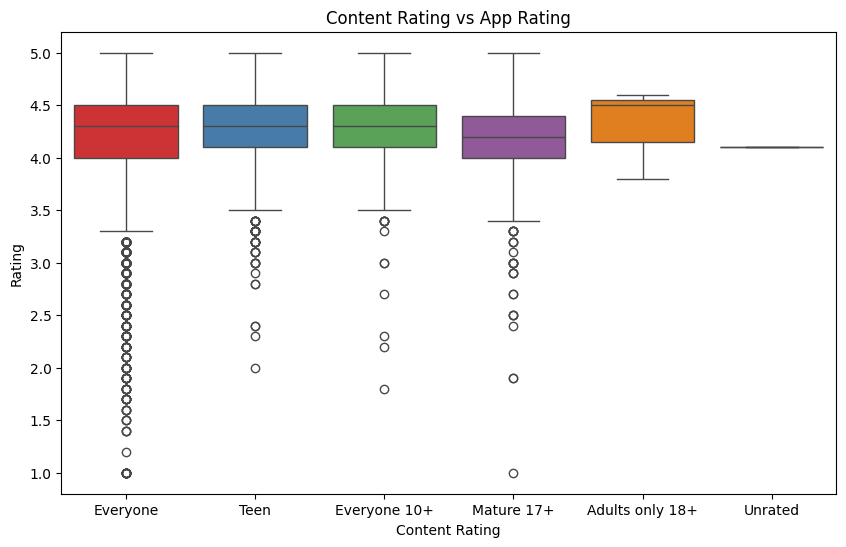

In [15]:
# Content Rating vs Rating

plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')
plt.title('Content Rating vs App Rating')
plt.show()

Genre and Installs Analysis

<ipython-input-16-95903e79742d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='Spectral')


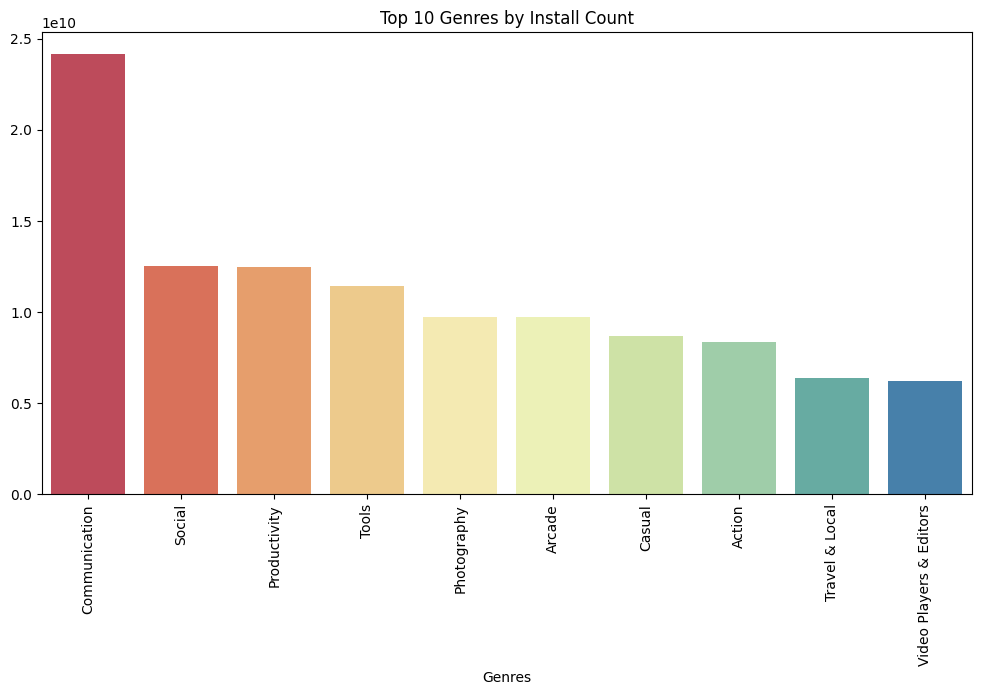

In [16]:
# Top Genres by Install Count

plt.figure(figsize=(12,6))
top_genres_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Top 10 Genres by Install Count')
plt.show()

Machine Learning (Predicting App Rating)

In [17]:
# Prepare Data for Modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])
df['Genres'] = label_encoder.fit_transform(df['Genres'])

X = df[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Content Rating']]
y = df['Rating']
y.fillna(y.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Check the results of label encoding

print("Encoded Categories:", df['Category'].unique())
print("Encoded Types:", df['Type'].unique())
print("Encoded Content Ratings:", df['Content Rating'].unique())
print("Encoded Genres:", df['Genres'].unique())

Encoded Categories: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 14 11 20 27 26 24 28
 30 29 23 25 22 32 31 21 19]
Encoded Types: [0 1 2]
Encoded Content Ratings: [1 4 2 3 0 5]
Encoded Genres: [  9  12  11  10  13  14  19  22  34  35  36  38  43  39  42  44  40  45
  41  52  57  54  55  59  60  61  62  65  66  67  69   3   6  27  23  33
   0 104  83 102  72 118  88  30  28  97   2  15 112  91  99   1  29  98
  49  85  50  25  48  51  56  31  74  89   8  92 100  86 103  47   7  53
  84 105  73  64   5  17  16  18  32  95  58 115  24  71 101  96  81 110
 111 108 109  80  82  76  79  78  77 117 114 116  75  70  63  46  26   4
 113  68  20  21  87  94  93 107  90  37 106]


In [19]:
# View the first few rows of your DataFrame to confirm changes

print(df.head())

                                                 App  Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook         0     4.1   
1                                Coloring book moana         0     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...         0     4.7   
3                              Sketch - Draw & Paint         0     4.5   
4              Pixel Draw - Number Art Coloring Book         0     4.3   

   Reviews  Size  Installs  Type  Price  Content Rating  Genres  \
0      159  19.0     10000     0    0.0               1       9   
1      967  14.0    500000     0    0.0               1      12   
2    87510   8.7   5000000     0    0.0               1       9   
3   215644  25.0  50000000     0    0.0               4       9   
4      967   2.8    100000     0    0.0               1      11   

       Last Updated         Current Ver   Android Ver  
0   January 7, 2018               1.0.0  4.0.3 and up  
1  January 15, 2018               2.0.0 

In [20]:
# Confirm the shapes of your split data

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (7249, 8)
Testing features shape: (3108, 8)
Training target shape: (7249,)
Testing target shape: (3108,)


In [21]:
# View a portion of the split data

print("Sample training data:\n", X_train.head())
print("Sample training target:\n", y_train.head())

Sample training data:
       Category  Reviews  Size  Installs  Type  Price  Genres  Content Rating
4201        27       17   8.5      1000     0   0.00     101               4
8918        11      276   NaN     50000     0   0.00      39               1
5701        29       35   NaN      1000     1   2.49     108               1
4069        28   521081   NaN  10000000     0   0.00     102               2
6067        28  3451011   NaN  50000000     0   0.00     102               1
Sample training target:
 4201    4.3
8918    4.4
5701    4.3
4069    4.2
6067    4.4
Name: Rating, dtype: float64


In [22]:
# Train a Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.21802146629650787
R-squared: 0.08439501568524288
